# **Análisis exploratorio - Palmer Pengüins**

En este repositorio pretendo hacer un Análisis Exploratorio del Dataset Penguin Palmers, partiendo de un conocimiento y limpieza de los datos, siguiendo con un análisis univariado para entender cómo se distribuye cada una de las variables para posteriormente analizar las relaciones en un análisis multivariado y terminar con la definición de modelos de regresión simple y múltiple con el fin de predecir características de nuevos pingüinos en el estudio como el peso o el tamaño de las alas, y modelos de regresión logística con el objetivo de clasificar nuevos pingüinos en el estudio según su sexo o especie a partir de los datos analizados.

In [1]:
'''
!pip install --upgrade pip
!pip install palmerpenguins==0.1.4 numpy pandas seaborn==0.12.1 matplotlib==3.5.3 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.0.2 pyjanitor==0.23.1 session-info
'''

'\n!pip install --upgrade pip\n!pip install palmerpenguins==0.1.4 numpy pandas seaborn==0.12.1 matplotlib==3.5.3 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.0.2 pyjanitor==0.23.1 session-info\n'

**Importando librerías**

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

**Estableciendo apariencia de los gráficos**

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (8, 5)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## **Carga y limpieza de los datos**

**Cargando datos**

In [4]:
raw_penguin_df = palmerpenguins.load_penguins_raw()
raw_penguin_df.head(2)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN


In [5]:
preprocess_penguin_df = palmerpenguins.load_penguins()
preprocess_penguin_df.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007


**Tipos de datos de las variables**

In [6]:
preprocess_penguin_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

**Variables por cada tipo dato**

In [7]:
(
    preprocess_penguin_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

**Cantidad de variables y observaciones**

In [8]:
preprocess_penguin_df.shape

(344, 8)

**¿Existen valores nulos?**

In [9]:
(
    preprocess_penguin_df
    .isnull()
    .any()        #Me indica si hay algún valor nulo en la las observaciones de las variables
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

**¿Cuántos valores nulos tengo por cada variable?**

In [10]:
(
    preprocess_penguin_df
    .isnull()
    .sum()    #Devuelve la suma de los valores nulos
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

**Proporción de valores nulos por cada variable**

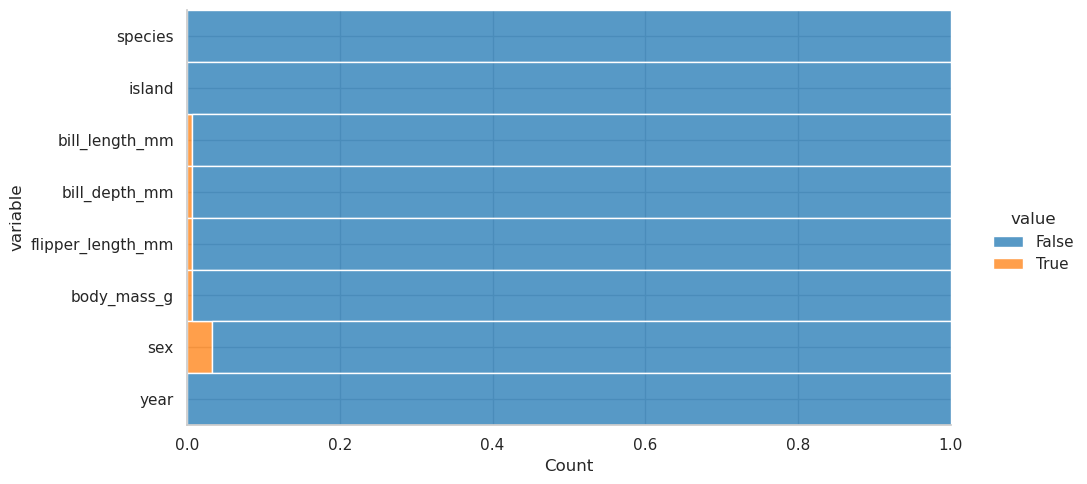

In [11]:
(
    preprocess_penguin_df
    .isnull()
    .melt()  #Transforma el dataframe convirtiéndolo en uno de dos columnas, una con la variable y otra con el valor (True/False)
    .pipe(   #Pasa el dataset transformado como input de la función lambda
        lambda df: (
            sns.displot(
            data = df,
            y = 'variable',
            hue = 'value',
            multiple = 'fill',
            aspect=2) #Genera una gráfica de distribución para observar la proporción de las variables nulas
        )
    )
)

**Visualizando los valores nulos en todo el conjunto de datos**

<AxesSubplot:>

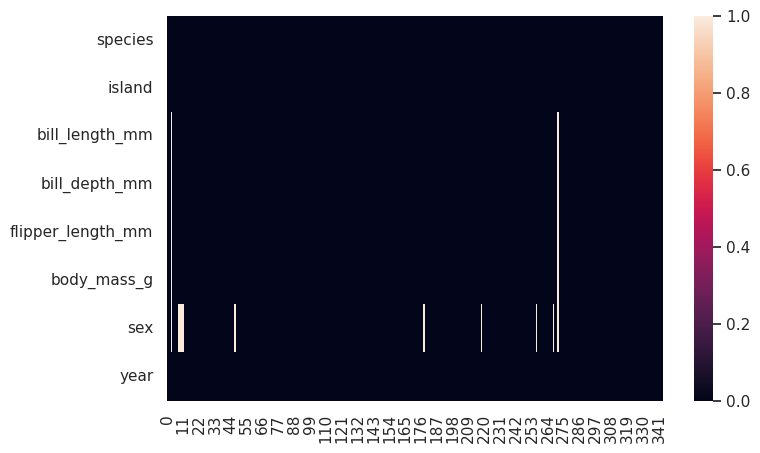

In [12]:
(
    preprocess_penguin_df
    .isnull()
    .transpose() #Transpone el dataset dejando las variables en las filas y las observaciones en la columna
    .pipe(       #Pasa el dataset transpuesto como input para la función lambda
        lambda df: (
            sns.heatmap(
            data = df
            )
        )
    )
)

Teniendo en cuenta que observamos que la mayoría de datos faltantes provienen de un solo pingûino, 
podemos tomar la decisión de simplemente eliminar dichas observaciones del análisis.

In [13]:
process_penguin_df = (
    preprocess_penguin_df
    .dropna()
) #Eliminando datos nulos

process_penguin_df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


In [14]:
process_penguin_df.shape

(333, 8)

## **Análisis de las variables**

**Conteos y proporciones**

¿Qué estadísticos describen el conjunto de datos?

  
  **Todas las variables**

In [15]:
process_penguin_df.describe(include = 'all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


**Análisis variables numéricas**

In [16]:
process_penguin_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


**Análisis variables categóricas**

In [17]:
process_penguin_df.describe(include = 'object')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


*Convirtiendo mis variables categóricas a tipo categoría*

In [18]:
(
    process_penguin_df
    .astype({
        'species':'category',
        'island':'category',
        'sex':'category'
    }
    )
    .dtypes
)

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                    int64
dtype: object

**Visualizando los conteos con Seaborn**

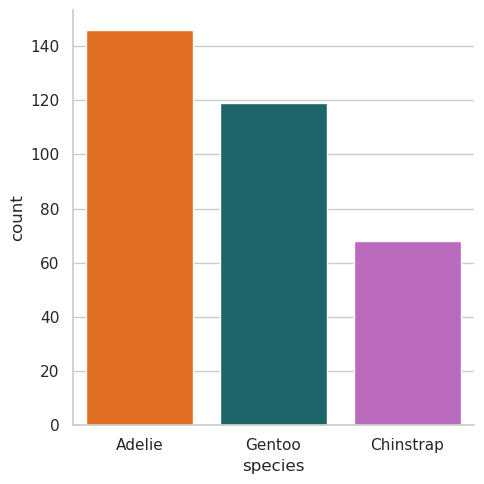

In [19]:
sns.catplot(
    data = process_penguin_df,
    x = 'species',
    kind = 'count',
    palette = penguin_color
)

**¿Cómo visualizamos las proporciones**

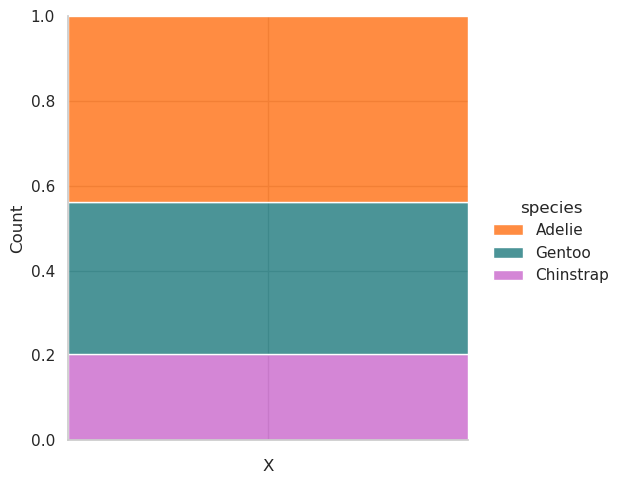

In [20]:
(
    process_penguin_df
    .add_column('X', '')
    .pipe(
        lambda df: (
            sns.displot(
                data = df,
                x = 'X',
                hue = 'species',
                multiple = 'fill',
                palette = penguin_color
            )
        )
    )

)

A partir de estos gráficos podemos comprender que en la muestra seleccionada para este análisis hay una proporción mayor de pingüinos de la especie Adelie, seguido de los Gentoo y por último, los Chinstrap, información que será relevante más adelante.

**Analizando la varioable Island en cuanto a cantidad y proporción**

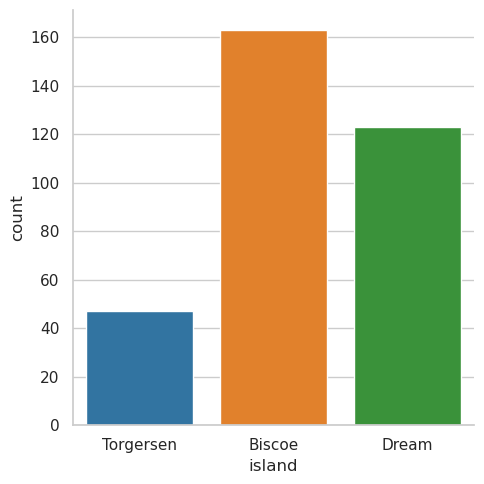

In [21]:
sns.catplot(
    data = process_penguin_df,
    x = 'island',
    kind = 'count',
)

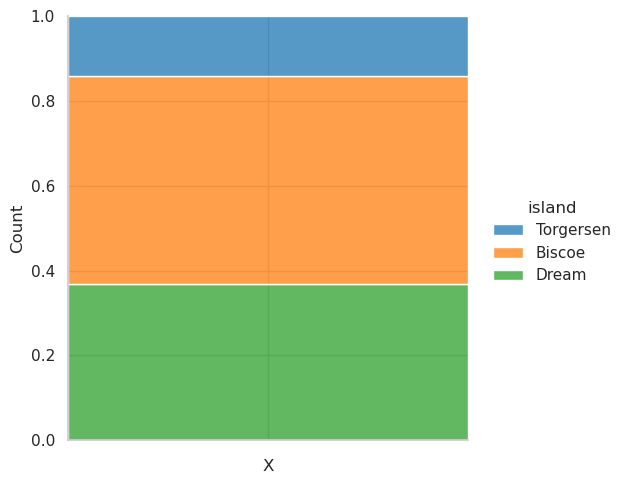

In [22]:
(
    process_penguin_df
    .add_column('X', '')
    .pipe(
        lambda df:
            sns.displot(
                data = df,
                x = 'X',
                hue = 'island',
                multiple = 'fill'
            )
    )
)

Así mismo, vemos que la isla que predomina en en la muestra es Biscoe, seguida de Dream y, por último, Torgersen. Más adelante analizaremos si esta información es relevante para determinar las caracterísicas de los pingüinos.

**Por último, analizamos la variable Sex y sus proporciones**

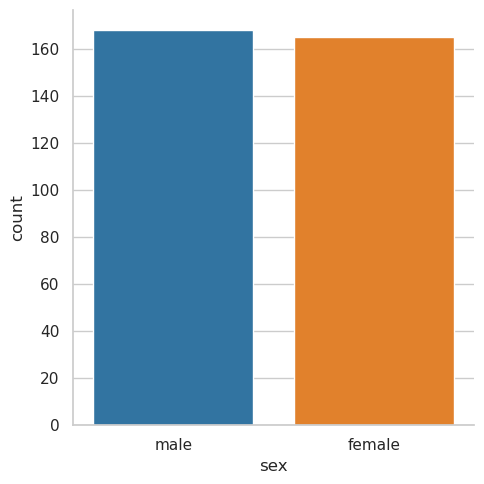

In [23]:
sns.catplot(
    data = process_penguin_df,
    x = 'sex',
    kind = 'count'
    
)

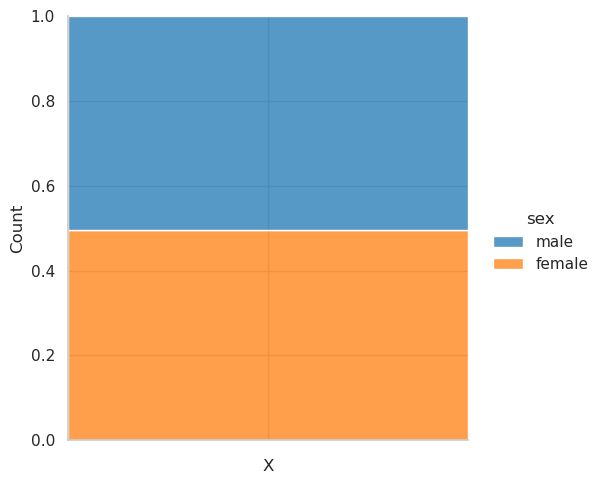

In [24]:
(
    process_penguin_df
    .add_column('X', '')
    .pipe(
        lambda df: 
            sns.displot(
                data = df,
                x = 'X',
                hue = 'sex',
                multiple = 'fill'
            )
    )

)

Podemos que la distribución respecto al sexo es uniforme en los datos analizados.

**Medidas de Tendencia Central**

***Media***

In [25]:
process_penguin_df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [26]:
process_penguin_df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']].mean()

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

***Mediana***

In [27]:
process_penguin_df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']].median()

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64

***Moda***

In [28]:
process_penguin_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


**Medidas de dispersión**

*Valor máximo de las variables*

In [29]:
process_penguin_df.max(numeric_only = True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

In [30]:
process_penguin_df.min(numeric_only = True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

In [31]:
#Rango

process_penguin_df.max(numeric_only = True) - process_penguin_df.min(numeric_only = True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

*Desviación estándar*

In [32]:
process_penguin_df.std(numeric_only = True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

**Rango Intercuartil**

In [33]:
process_penguin_df.quantile(0.75) - process_penguin_df.quantile(0.25)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [34]:
(
    process_penguin_df
    .quantile(q=[0.75, 0.50, 0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr =  lambda df: df[0.75] - df[0.25]
    )
)

,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


**Visualizando la distribución de las variables**

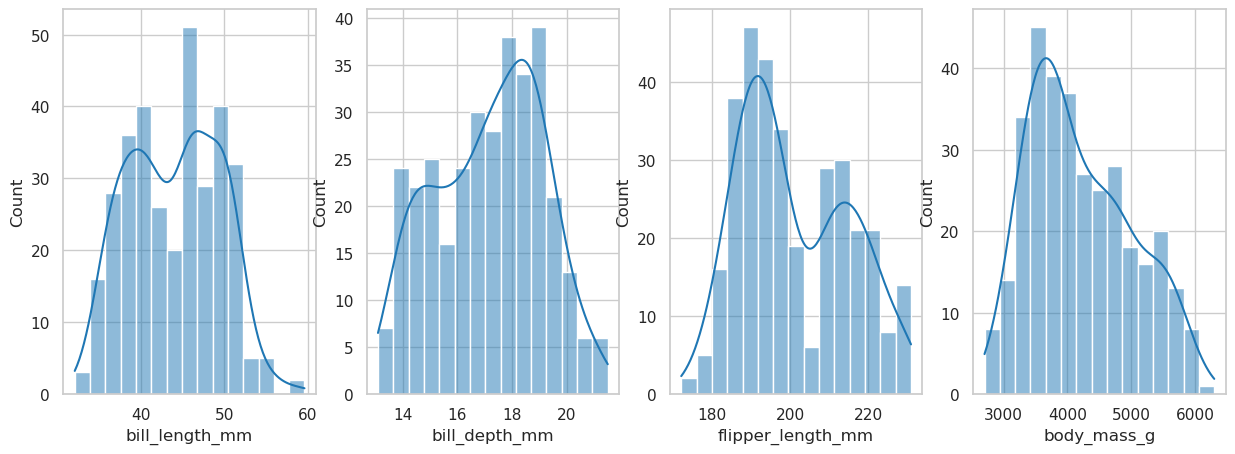

In [35]:
numeric_columns = process_penguin_df.select_dtypes(include=np.number).columns

fig, ax = plt.subplots(1, len(numeric_columns)-1, figsize=(15,5))

for i in range(len(numeric_columns)-1):
    sns.histplot(
        ax = ax[i],
        data = process_penguin_df,
        x = numeric_columns[i],
        bins = 15,
        kde = 'true'
    )
 

Los histogramas nos permiten observar la distribución de cada una de las variables y analizar si siguen una distribución conocida. Si bien las distribuciones observadas tienden a parecerse a la distribución normal, en algunos casos presentan unos picos o valles anómalos (es más evidente en las distribuciones de la longitud del pico y la longitud de las alas), ¿a qué debe este fenómeno? ¿Cambiará en algo si analizamos las distribuciones segregadas por especies?

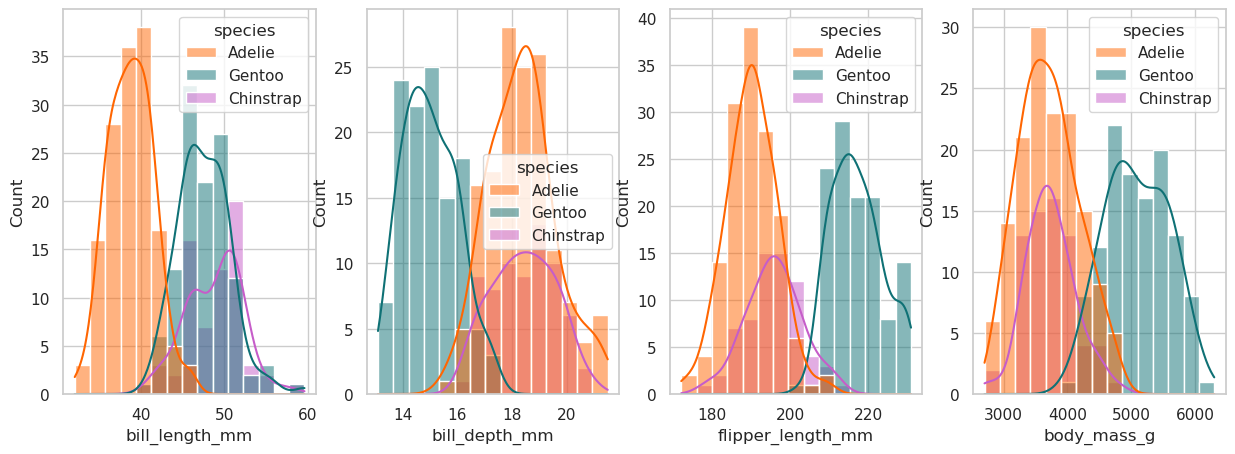

In [36]:
numeric_columns = process_penguin_df.select_dtypes(include=np.number).columns

fig, ax = plt.subplots(1, len(numeric_columns)-1, figsize=(15,5))

for i in range(len(numeric_columns)-1):
    sns.histplot(
        ax = ax[i],
        data = process_penguin_df,
        x = numeric_columns[i],
        multiple = 'layer',
        hue = 'species',
        bins = 15,
        palette = penguin_color,
        kde = 'true'
    )
 

Después de analizar las distribuciones de las variables segregadas por especie, podemos ver que, en efecto, este comportamiento anómalo en la curva se debía a diferencias morfológicas en las especies y sus distribuciones, vistas por separado, se acercan más a una distribución normal, que es lo que usualmente se espera.

Para ver de forma más detallada esta distribución anómala (antes de la segregación por especie) podemos tomar una de las gráficas. En este caso, la medida de la aleta:

Text(213.0, 53, 'Q(75%)')

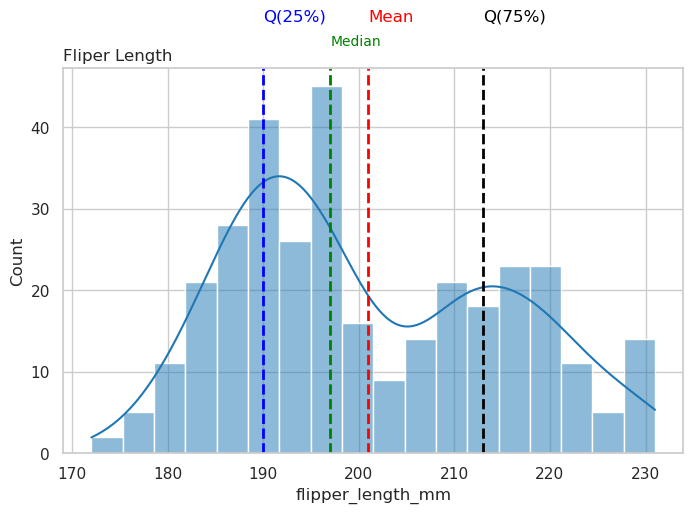

In [106]:
sns.histplot(
    data = process_penguin_df,
    x= 'flipper_length_mm',
    kde = True,
    bins = 18
)

plt.axvline(
    x = process_penguin_df.flipper_length_mm.mean(),
    color = 'red',
    linestyle = 'dashed',
    linewidth = 2
)
plt.axvline(
    x = process_penguin_df.flipper_length_mm.median(),
    color = 'green',
    linestyle = 'dashed',
    linewidth = 2
)

plt.axvline(
    x = process_penguin_df.flipper_length_mm.quantile(0.25),
    color = 'blue',
    linestyle = 'dashed',
    linewidth = 2
)

plt.axvline(
    x = process_penguin_df.flipper_length_mm.quantile(0.75),
    color = 'black',
    linestyle = 'dashed',
    linewidth = 2
)

plt.title('Fliper Length', loc = 'left')
plt.text(process_penguin_df.flipper_length_mm.mean(), 53, 'Mean', fontsize=12, color = 'red')
plt.text(process_penguin_df.flipper_length_mm.median(), 50, 'Median', fontsize=10, color = 'green')
plt.text(process_penguin_df.flipper_length_mm.quantile(0.25), 53, 'Q(25%)', fontsize=12, color = 'blue')
plt.text(process_penguin_df.flipper_length_mm.quantile(0.75), 53, 'Q(75%)', fontsize=12, color = 'black')

En este ejemplo se hace más claro el sesgo de la distribución a la izquierda, pero al analizar la gráfica nuevamente, agregando la segmentación por especie, vemos tres distribuciones de datos que se acercan un poco más a la distribución normal.

Text(0.0, 1.0, 'Bill Lenght')

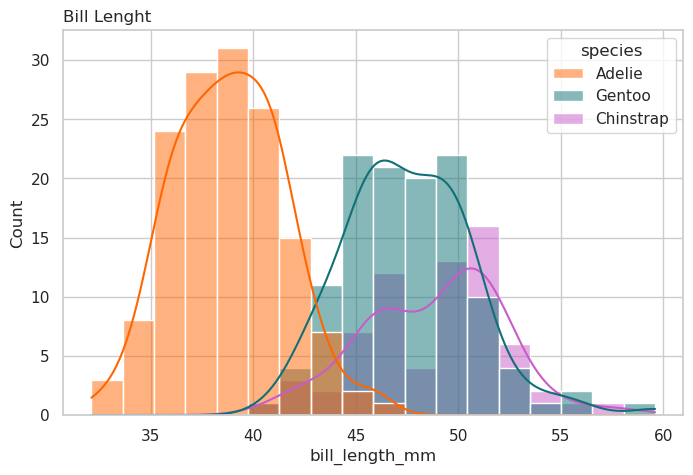

In [105]:
sns.histplot(
    data = process_penguin_df,
    x= 'bill_length_mm',
    hue = 'species',
    palette = penguin_color,
    kde = True,
    bins = 18
)


plt.title('Bill Lenght', loc = 'left')



Para confirmar esta suposición, podemos analizar otras de las variabes, como **Bill_depth_mm** que hace referencia a la profundidad del pico y **Body_mass_g**, que hace referencia al peso de los pingüinos.

Text(0.0, 1.0, 'Bill Depth mm')

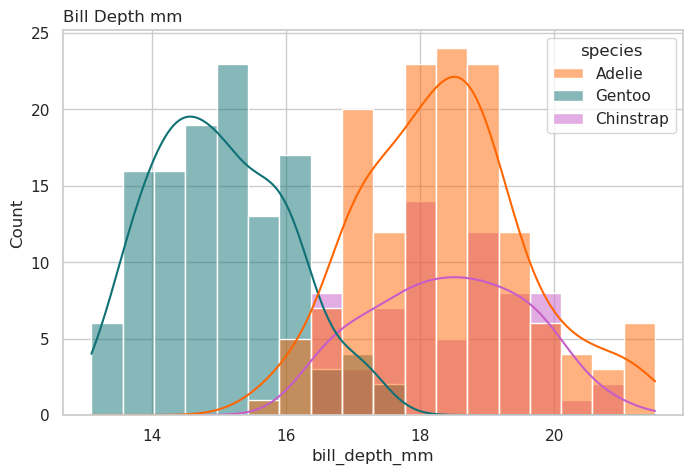

In [113]:
sns.histplot(
    data = process_penguin_df,
    x= 'bill_depth_mm',
    hue = 'species',
    palette = penguin_color,
    kde = True,
    bins = 18
)


plt.title('Bill Depth mm', loc = 'left')



Text(0.0, 1.0, 'Bofy mass (g)')

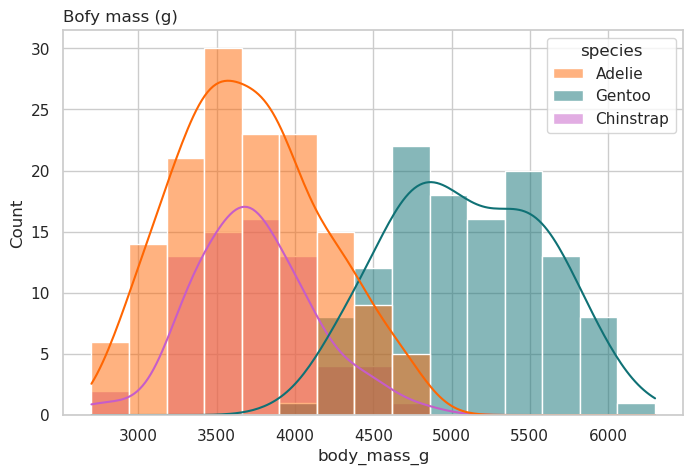

In [114]:
sns.histplot(
    data = process_penguin_df,
    x= 'body_mass_g',
    hue = 'species',
    palette = penguin_color,
    kde = True,
    bins = 15
)


plt.title('Bofy mass (g)', loc = 'left')


**¿Qué podemos concluir de esta primera parte del análisis?** 

Una de las conclusiones iniciales que podemos sacar de este análisis es que es indispensable analizar las variables en función de la especie de los pingüinos, pues estos presentan características morfológicas distintas. Analizar los datos como un todo podría llevarnos a conclusiones y modelos sesgados.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='species'>

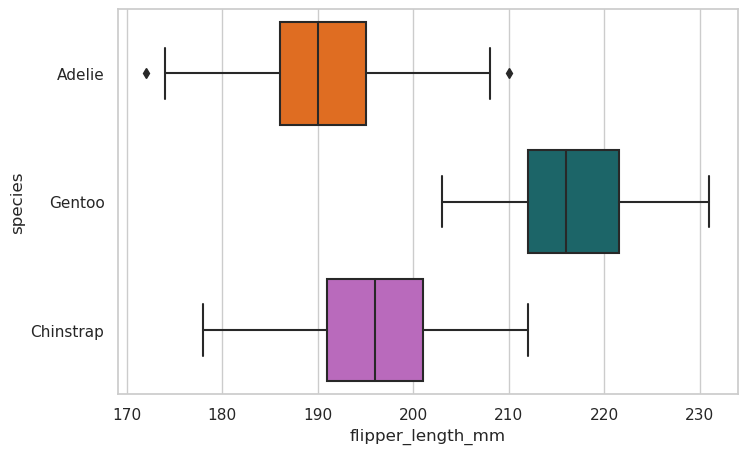

In [42]:
sns.boxplot(
    data = process_penguin_df,
    x = 'flipper_length_mm',
    y = 'species',
    palette = penguin_color
)

El anterior boxplot nos muestra que el tamaño medio de las alas de los pingüinos Gentoo es el mayor de las tres especies, seguidos por el Chinstrap y, por último, el Adelie. No obstante, el Adelie es el que presenta más *outliers* o datos anómalos.

Teniendo en cuenta lo anteriormente mencionado, el análisis no debe perder de vista la variable 'Specie'.

**Aplicando funciones de probabilidad**

¿Qué tan probable puede ser obtener una medida específica si tomamos aleatoriamente un pingüino? Esto lo podemos averiguar a partir de la graficación de

***Funciones de probabilidad de masas (PMFs)***

*Utilizando Seaborn*

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Probability'>

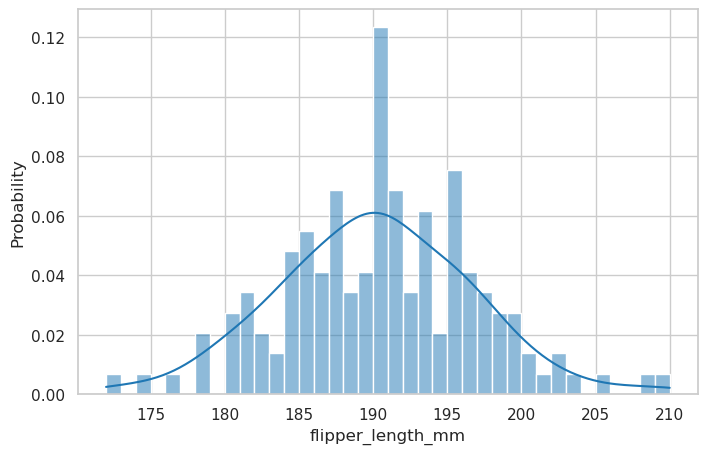

In [115]:
sns.histplot(
    data = process_penguin_df.query("species == 'Adelie'"),
    x = 'flipper_length_mm',
    binwidth = 1,
    stat = 'probability',  #Con este parámetro las barras ya no muestran el conteo sino que representan la probabilidad
    kde = True
)

*Utilizando Empiricaldist*

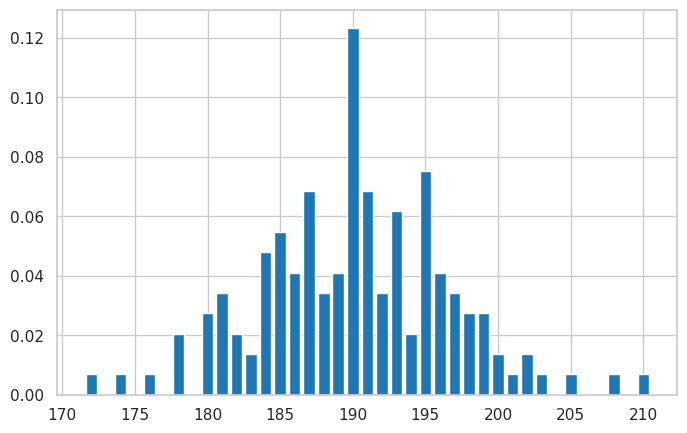

In [117]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    process_penguin_df.query("species == 'Adelie'").flipper_length_mm,
    normalize = True,
)

pmf_flipper_length_mm.bar()

In [46]:
pmf_flipper_length_mm(190) #Puedo preguntar la probabilidad de encontrar un valor determinado

0.06306306306306306

**Funciones empíricas de probabilidad acumulada (ECDFS)**

*Utilizando Seaborn*

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Proportion'>

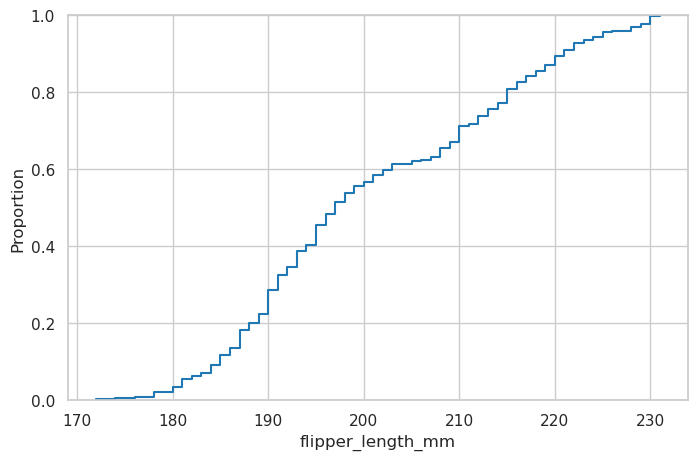

In [47]:
sns.ecdfplot(
    data = process_penguin_df,
    x = 'flipper_length_mm'
)

#Esta gráfica nos muestra la probabilidad acumulada, es decir, qué tan probable es encontrar un valor menor o igual a X medida

*Utilizando EmpiricalDist*

In [48]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    process_penguin_df.flipper_length_mm,
    normalize = True
)

<AxesSubplot:>

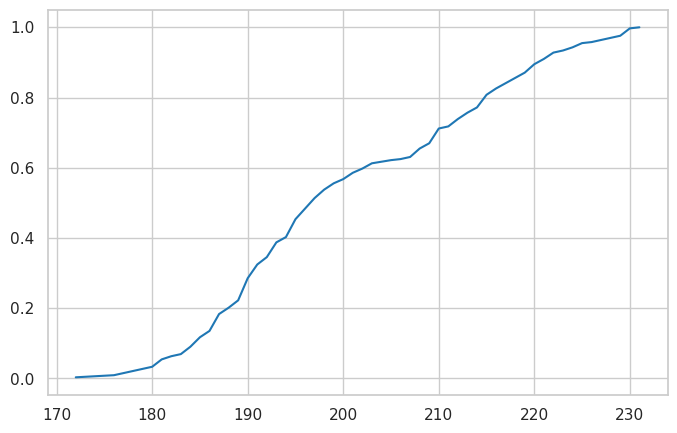

In [49]:
cdf_flipper_length_mm.plot()

In [50]:
def graf_prob_acum(columna, medida):
    
    cdf_variable = empiricaldist.Cdf.from_seq(
    process_penguin_df[columna],
    normalize = True
    )
    
    cdf_variable.plot()

    q = medida
    p = cdf_variable.forward(q)
    
    plt.title(columna, loc = 'left')

    plt.vlines(
        x=q,
        ymin=0,
        ymax=p,
        color='black',
        linestyle='dashed'
    )

    plt.hlines(
        y=p,
        xmin=cdf_variable.qs[0],
        xmax=q,
        color='black',
        linestyle='dashed'
    )

    plt.plot(q,p, 'ro')

None


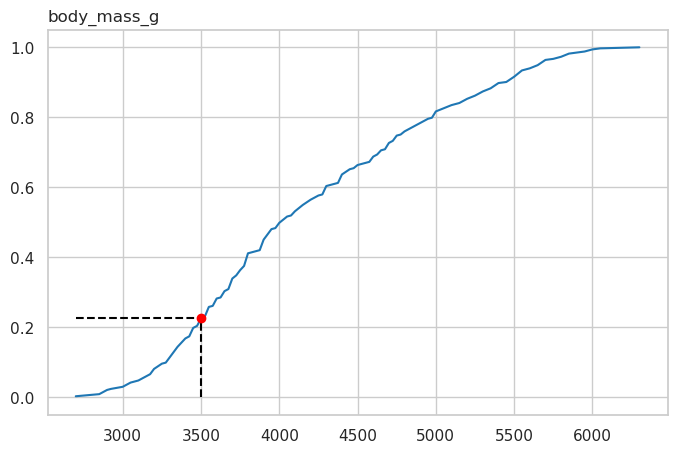

In [51]:
print(graf_prob_acum('body_mass_g', 3500))

**Comparando distribuciones**

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Proportion'>

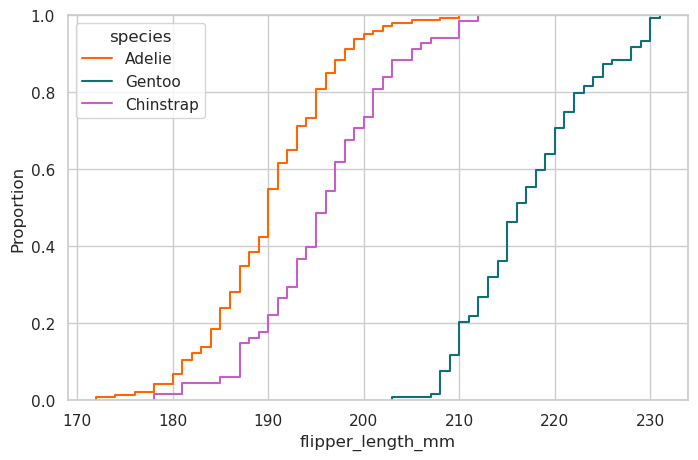

In [52]:
sns.ecdfplot(
    data = process_penguin_df,
    x = 'flipper_length_mm',
    hue = 'species',
    palette = penguin_color
)

#Distribución acumulada de probabilidad de cada una de las especies

**Funciones de densidad de probabilidad**

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

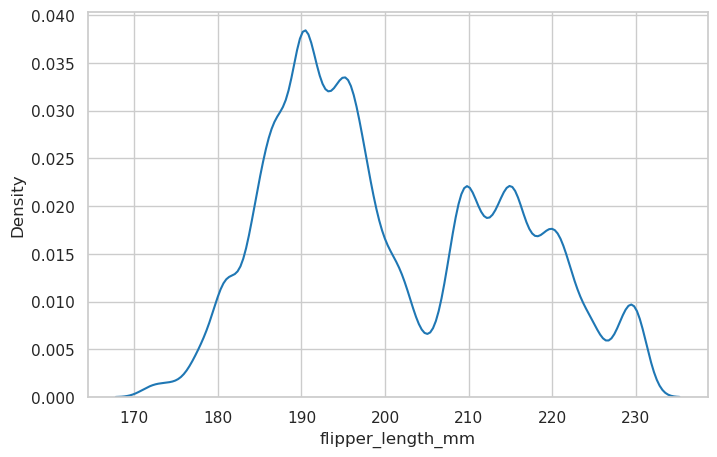

In [53]:
sns.kdeplot(
    data = process_penguin_df,
    x = 'flipper_length_mm',
    #hue = 'species',
    bw_method = 0.1 #Modifica el ancho de la banda
)

In [54]:
stats = process_penguin_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<AxesSubplot:>

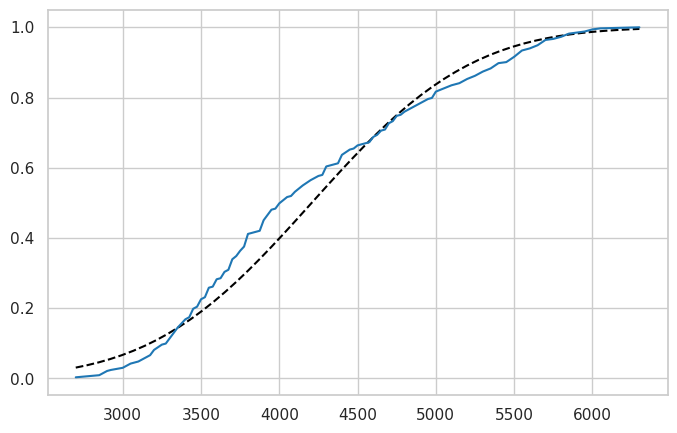

In [55]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)

plt.plot(xs, ys, color = 'black', linestyle = 'dashed')

#La línea punteada muestra el comportamiento de las probabilidades si los datos siguieran una distribución normal
#Graficamos la función de probabilidad acumulada

empiricaldist.Cdf.from_seq(
    process_penguin_df.body_mass_g,
    normalize = True
).plot() #Línea azul


<AxesSubplot:xlabel='body_mass_g', ylabel='Density'>

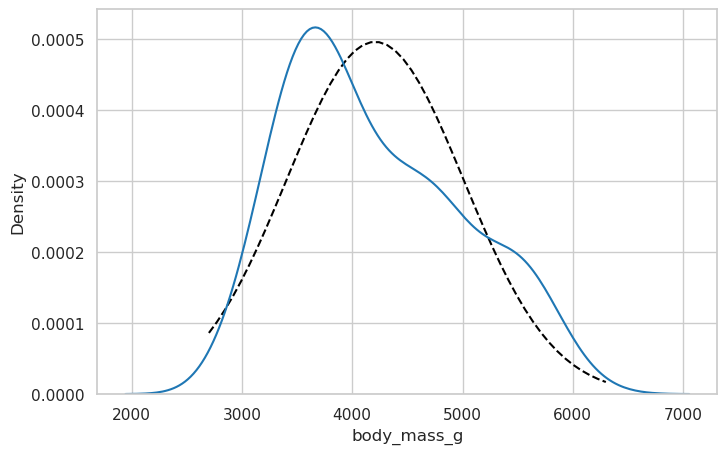

In [56]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

plt.plot(xs, ys, color = 'black', linestyle = 'dashed')

#La línea punteada muestra el comportamiento de las probabilidades si los datos siguieran una distribución normal
#Graficamos la función de probabilidad acumulada

sns.kdeplot(
    data = process_penguin_df,
    x = 'body_mass_g'
)

A partir de estos dos contrastes entre la distribución teórica y la real, 
observamos que nuestros datos sobre el peso no siguen precisamente una distribución normal, 
pues presentan un sesgo a la izquierda.

**Ley de los grandes números**

In [57]:
process_penguin_df.sex.value_counts(normalize = True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

In [58]:
sex_numeric = process_penguin_df.sex.replace(['male', 'female'], [0, 1])

In [59]:
number_samples = 100
sample_size = 35

samples_df = pd.DataFrame()

np.random.seed(42)

for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace = True).to_numpy()
    sample_name = f"sample{i}"
    samples_df[sample_name] = sex_numeric_sample

male_population_mean = samples_df.mean().mean()

print(f"Porcentaje estimado de pinguinos machos en la población es: {male_population_mean * 100:.4f}%")

Porcentaje estimado de pinguinos machos en la población es: 50.0857%


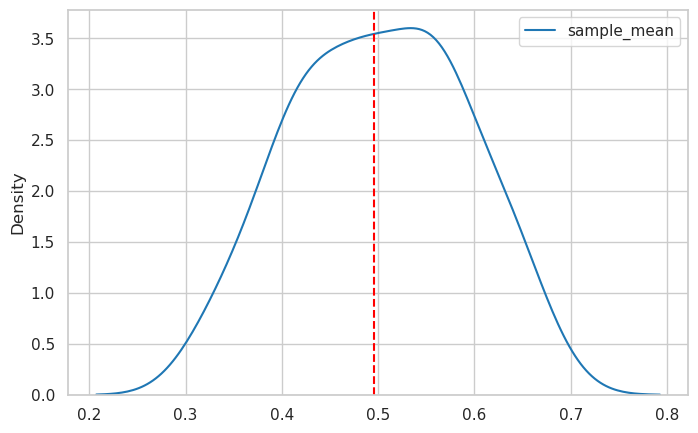

In [60]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns =['sample_mean'])
sns.kdeplot(data = sample_means_binomial)
plt.axvline(x = sex_numeric.mean(), color = 'r', linestyle = '--')

**Análisis bivariado**

**Estableciendo relaciones: Gráficos de puntos**

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

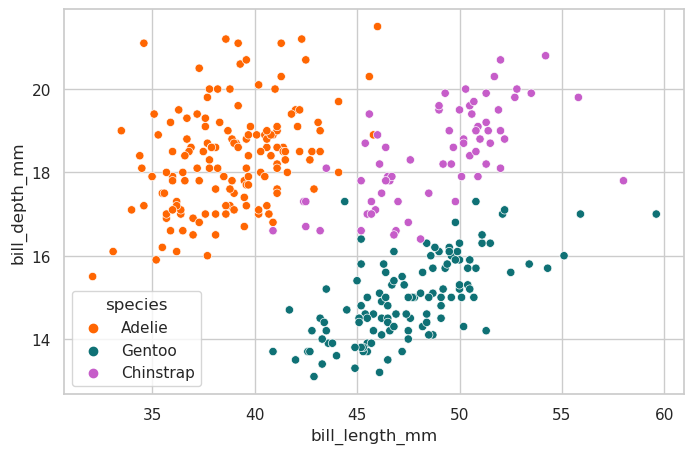

In [61]:
sns.scatterplot(data = process_penguin_df,
            x = 'bill_length_mm',
            y = 'bill_depth_mm',
            hue = 'species',
            palette = penguin_color
            )

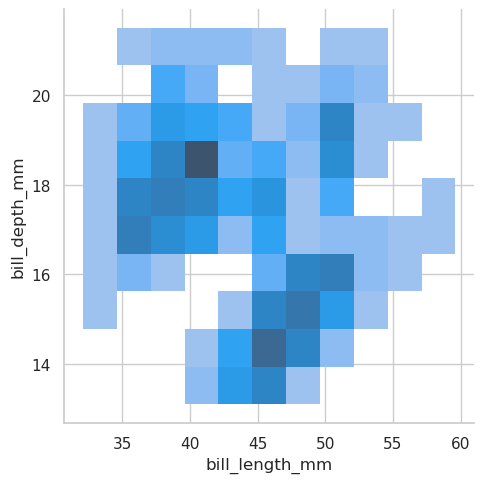

In [62]:
#General

sns.displot(
    data = process_penguin_df,
    x= 'bill_length_mm',
    y= 'bill_depth_mm'
)

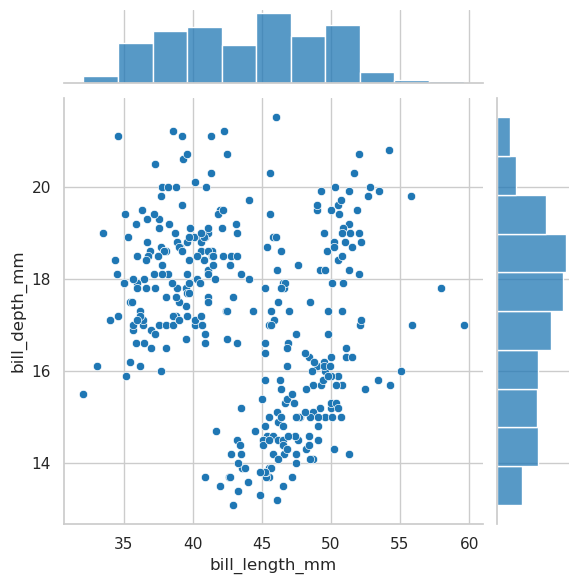

In [63]:
sns.jointplot(
    data =  process_penguin_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm'
)

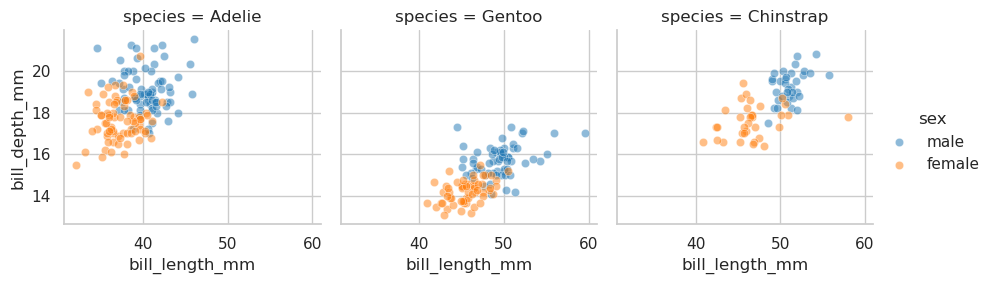

In [64]:
#Analizando relaciones del tamaño de los picos según la especie
(
    sns.FacetGrid(
        process_penguin_df,
        col = 'species',
        hue = 'sex'
    )
    .map(
        sns.scatterplot,
        'bill_length_mm',
        'bill_depth_mm',
        alpha = 0.5
    )
    .add_legend()

)

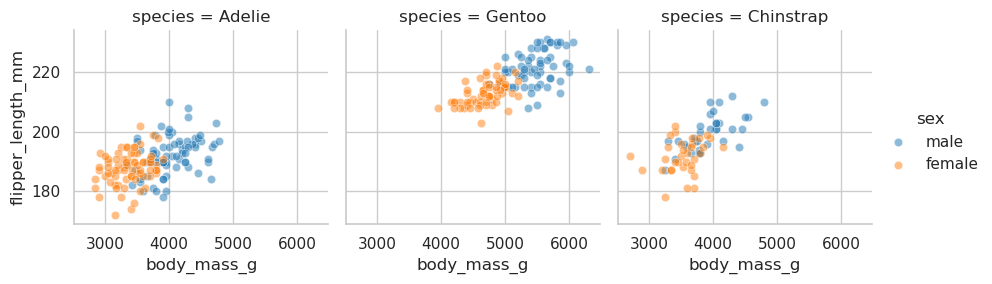

In [65]:
#Analizando relaciones entre el peso y el tamaño de las alas según la especie y diferenciado por sexo
(
    sns.FacetGrid(
        process_penguin_df,
        col = 'species',
        hue = 'sex'
    )
    .map(
        sns.scatterplot,
        'body_mass_g',
        'flipper_length_mm',
        alpha = 0.5
    )
    .add_legend()

)

**Esableciendo relaciones: Gráficos de Violín y Boxplots**

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

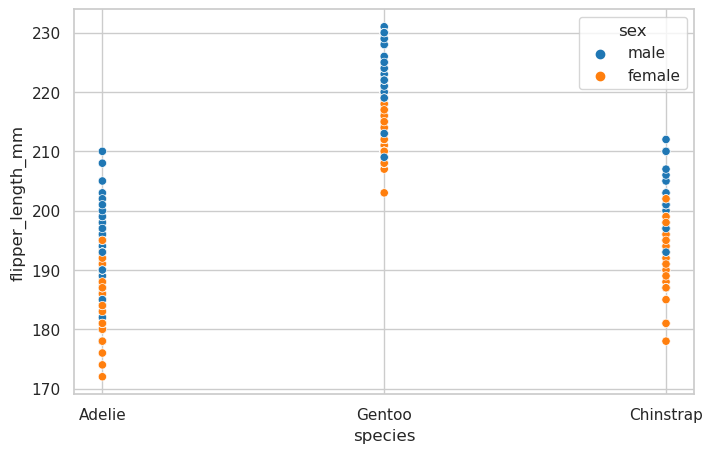

In [66]:
sns.scatterplot(
    data = process_penguin_df,
    x = 'species',
    y = 'flipper_length_mm',
    hue = 'sex',
    color = penguin_color
)

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

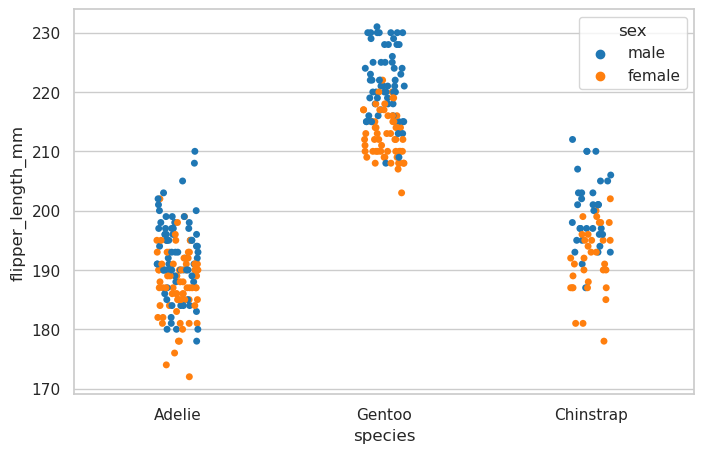

In [67]:
#Añadiendo ruido para visualizar mejor los puntos:

sns.stripplot(
    data = process_penguin_df,
    x = 'species',
    y = 'flipper_length_mm',
    hue = 'sex'
)

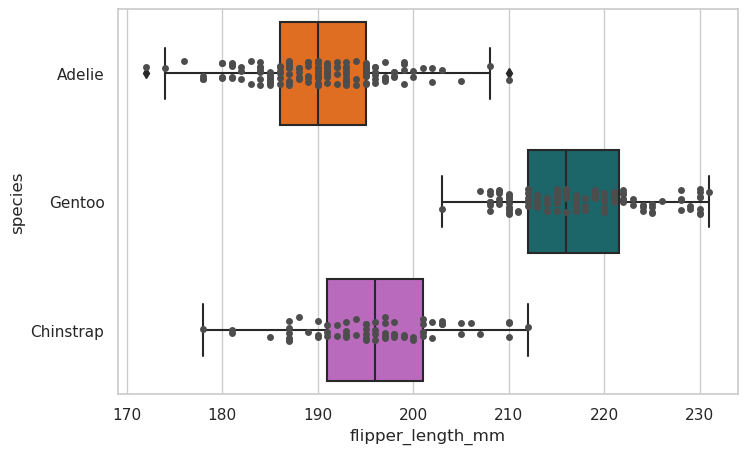

In [68]:
ax= sns.boxplot(
    data = process_penguin_df,
    x = 'flipper_length_mm',
    y = 'species',
    #hue = 'species',
    palette = penguin_color
)

#Añadiendo puntos para visualizar mejor la distribución

ax = sns.stripplot(
    data = process_penguin_df,
    x = 'flipper_length_mm',
    y = 'species',
    color = '.3'
)

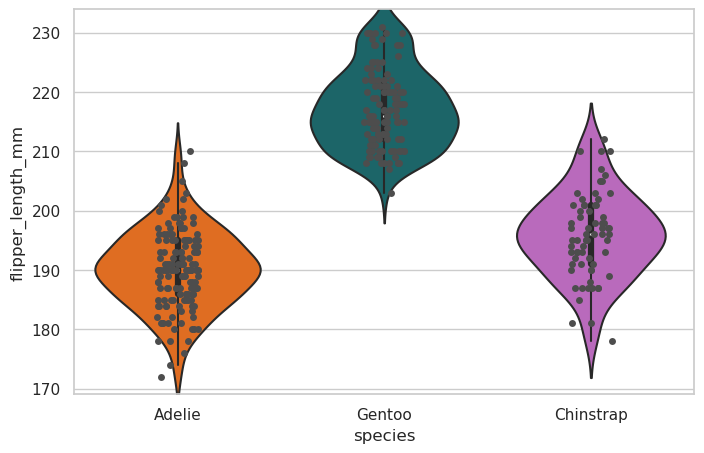

In [69]:
ax = sns.violinplot(
    data = process_penguin_df,
    x = 'species',
    y = 'flipper_length_mm',
    #hue = 'species',
    palette = penguin_color
)


ax = sns.stripplot(
    data = process_penguin_df,
    x = 'species',
    y = 'flipper_length_mm',
    color = '.3'
)

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

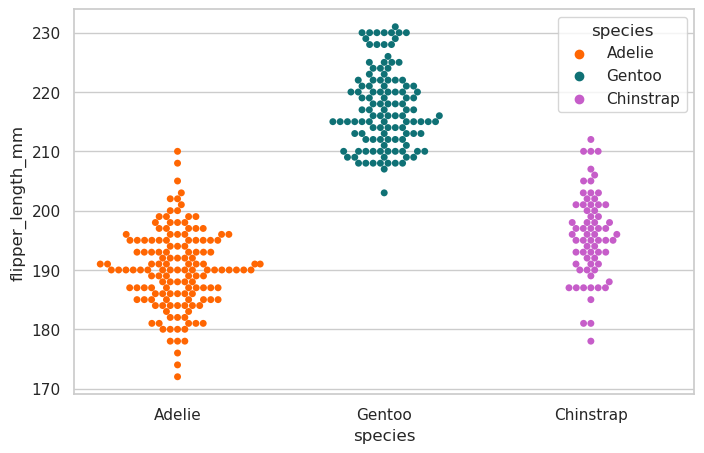

In [70]:
sns.swarmplot(
    data = process_penguin_df,
    x = 'species',
    y = 'flipper_length_mm',
    hue = 'species',
    palette = penguin_color
)

**Estableciendo relaciones: Matrices de correlación**

In [71]:
process_penguin_df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


<AxesSubplot:>

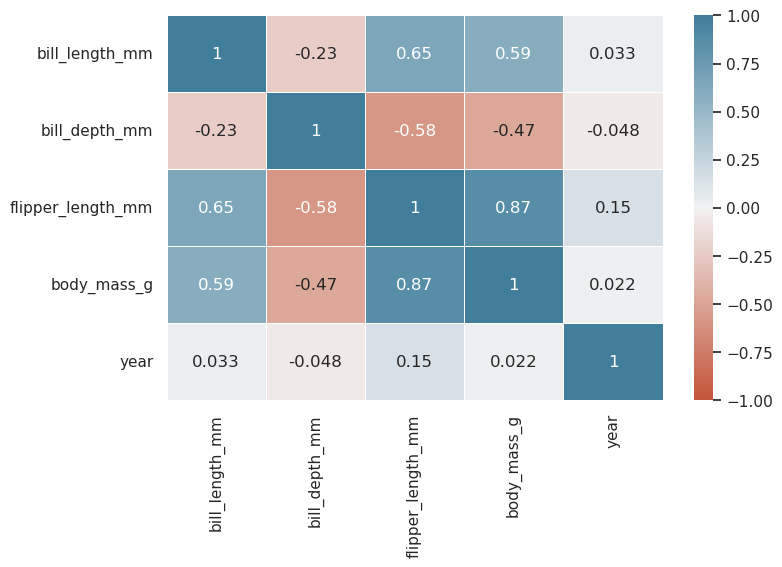

In [72]:
sns.heatmap(
    process_penguin_df.corr(),
    cmap = sns.diverging_palette(20, 230, as_cmap = True),
    center = 0,
    vmin =-1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
)

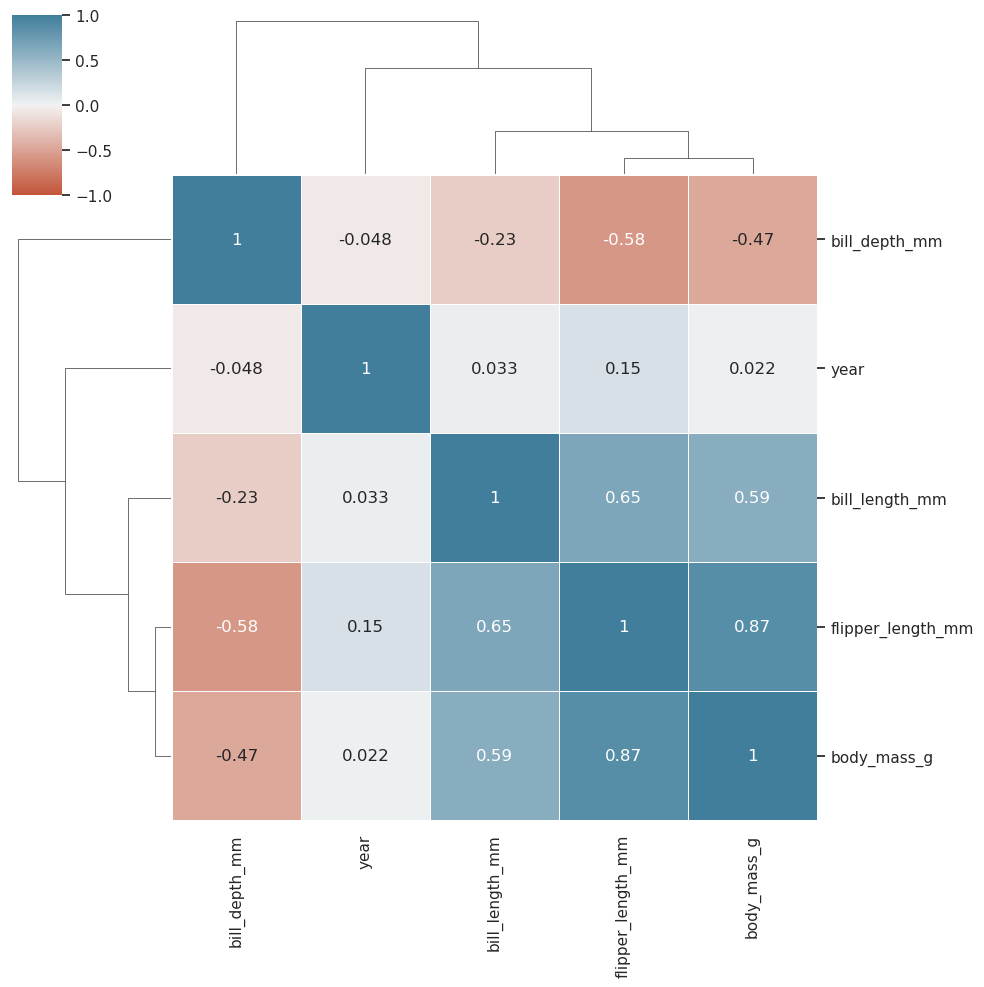

In [73]:
#Ordena las variables de modo tal que las mayores correlaciones se agrupen

sns.clustermap(
    process_penguin_df.corr(),
    cmap = sns.diverging_palette(20, 230, as_cmap = True),
    center = 0,
    vmin =-1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
)

**¿Hay alguna correlación con el sexo de los pingüinos?** Para averiguarlo debemos agregar una columna de sexo representado de forma numérica:

In [74]:
process_penguin_df = (
    process_penguin_df.assign(
        numeric_sex = lambda df: df.sex.replace(['female', 'male'], [0, 1])
                             )
)

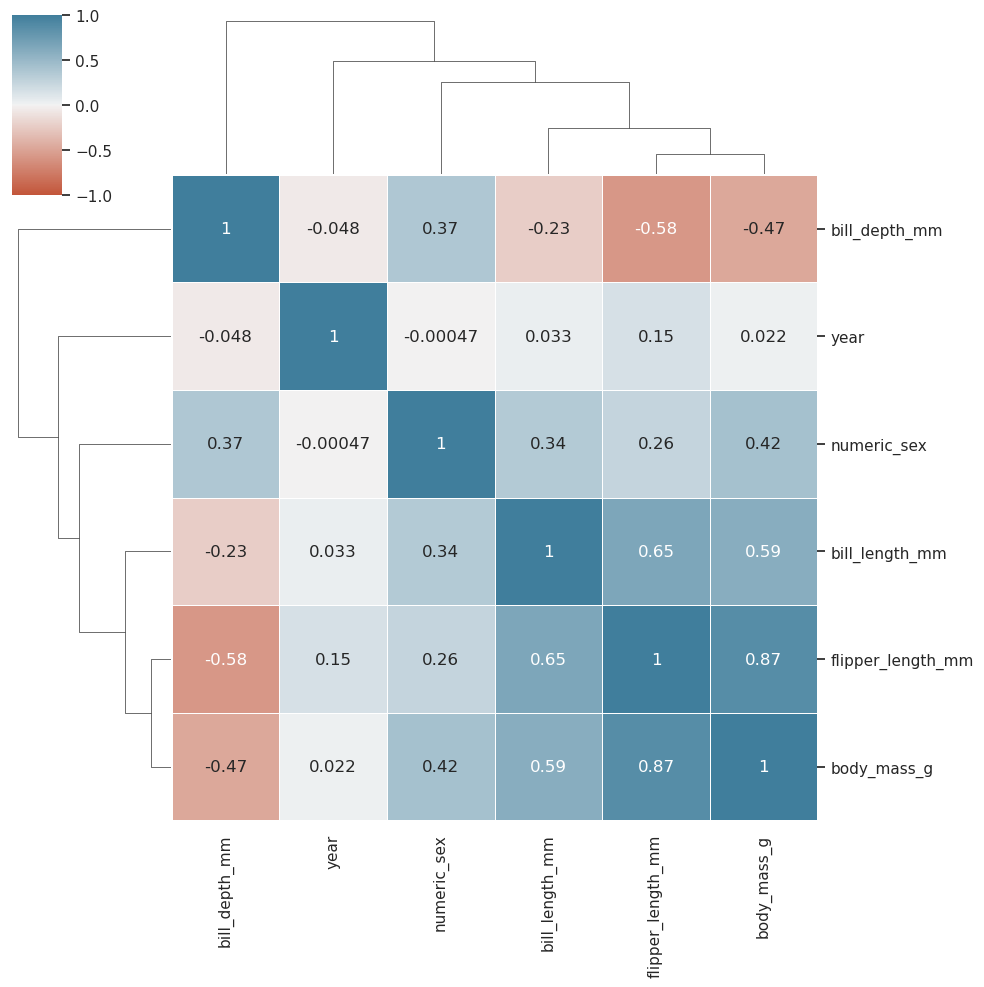

In [75]:
#Graficamos nuevamente el Clustermap para analizar la correlación de las variables con el sexo

sns.clustermap(
    process_penguin_df.corr(),
    cmap = sns.diverging_palette(20, 230, as_cmap = True),
    center = 0,
    vmin =-1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
)

**Estableciendo relaciones: Análisis de Regresión Simple**

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


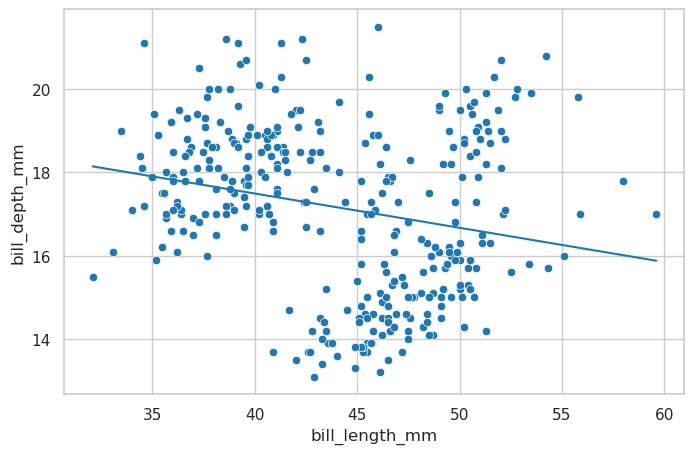

In [76]:
sns.scatterplot(
    data = process_penguin_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm'
)

res_bill_penguins = scipy.stats.linregress(
    x = process_penguin_df.bill_length_mm,
    y = process_penguin_df.bill_depth_mm
)

print(res_bill_penguins)

fx_1 = np.array([process_penguin_df.bill_length_mm.min(), process_penguin_df.bill_length_mm.max()])
fy_1 = res_bill_penguins.intercept + res_bill_penguins.slope * fx_1

plt.plot(fx_1, fy_1)

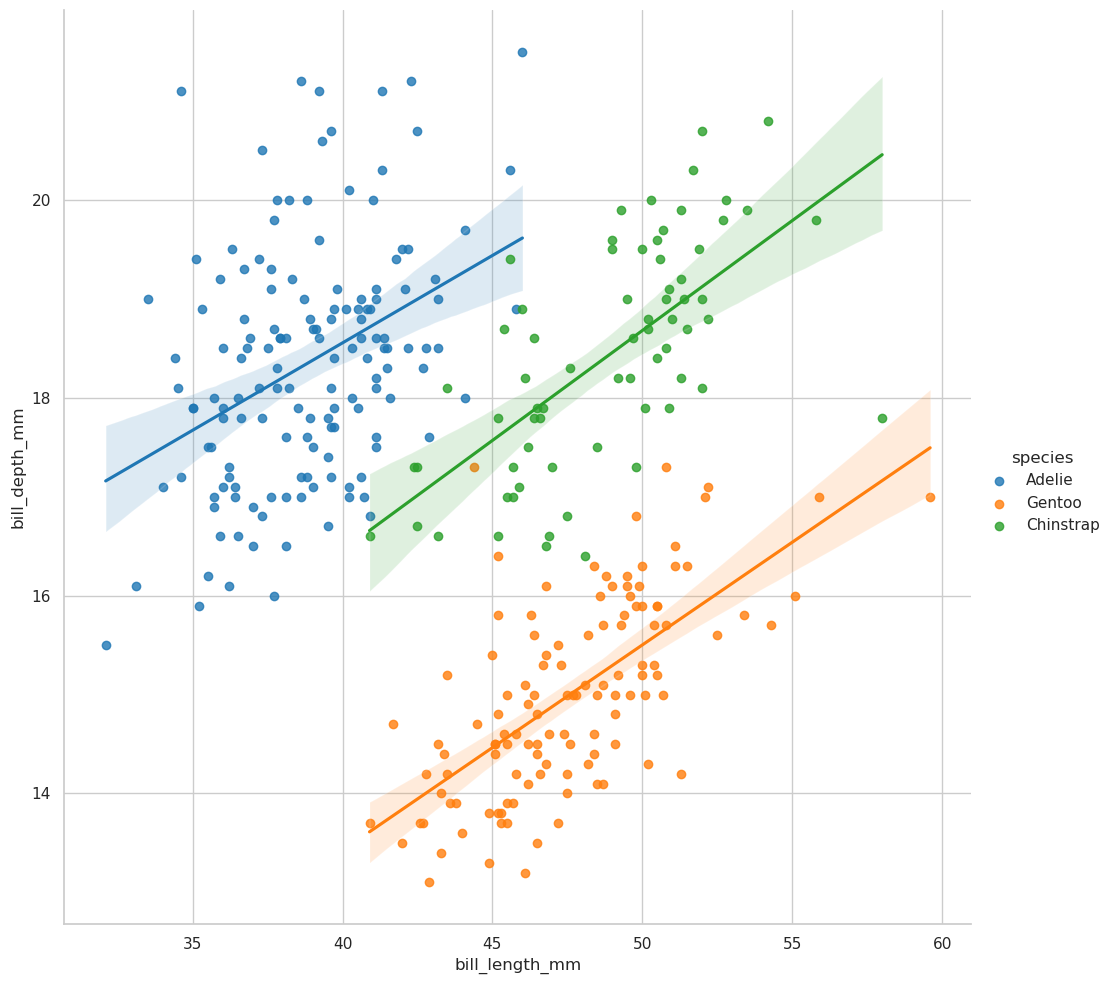

In [77]:
#Graficando la regresión directamente con Seaborn

sns.lmplot(
    data = process_penguin_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    height = 10,
    hue = 'species'
)

LinregressResult(slope=0.015195264815217668, intercept=137.03962089225467, rvalue=0.8729788985653613, pvalue=3.1328362509719978e-105, stderr=0.00046665391049053467, intercept_stderr=1.9987694290243143)


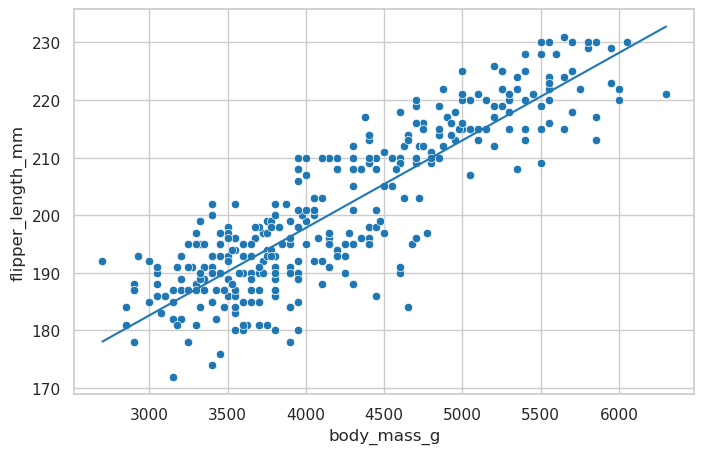

In [78]:
#Regresión lineal entre el peso y el tamaño de las alas

sns.scatterplot(
    data = process_penguin_df,
    x = 'body_mass_g',
    y = 'flipper_length_mm'
)


reg_body_flip = scipy.stats.linregress(
    x = process_penguin_df.body_mass_g,
    y= process_penguin_df.flipper_length_mm)

print(reg_body_flip)


eje_x_regress_bf = np.array([process_penguin_df.body_mass_g.min(), process_penguin_df.body_mass_g.max()])
eje_y_regress_bf = reg_body_flip.intercept + reg_body_flip.slope * eje_x_regress_bf

plt.plot(eje_x_regress_bf, eje_y_regress_bf)

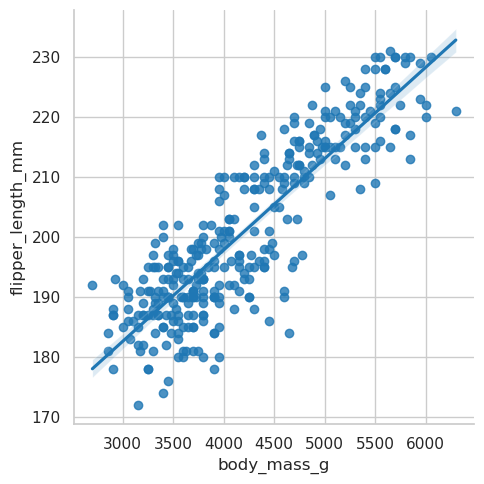

In [79]:
sns.lmplot(
    data = process_penguin_df,
    x = 'body_mass_g',
    y = 'flipper_length_mm',
    #hue = 'species',
    #palette = penguin_color
)

**Creando un modelo de Regresión Lineal**

In [80]:
(
    smf.ols(
        formula = 'body_mass_g ~ flipper_length_mm',
        data = process_penguin_df
    )
    .fit()
    .params
)

Intercept           -5872.092683
flipper_length_mm      50.153266
dtype: float64

**Análisis de regresión múltiple**

Partiendo del supuesto de que no tengo forma de conocer el peso de los próximos pingüinos en nuestro estudio,
¿Cómo podría capturar este dato?

**Creando modelos**

*Modelo 1*

In [81]:
model_1 = (
    smf.ols(
    formula = 'body_mass_g ~ bill_length_mm',
    data = process_penguin_df
    ).
    fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           1.54e-32
Time:                        17:49:45   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notas para interpretación: El 86.79 del coeficiente de la longitud del pingüino nos indica que por cada cambio en dicha medida, es decir, en la longitud del pico, esperaríamos un aumento de 86.79 gramos en el peso.

In [82]:
model_2 = (
    smf.ols(
    formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm',
    data = process_penguin_df
    ).
    fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           7.04e-46
Time:                        17:49:45   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
model_3 = (
    smf.ols(
    formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm +  flipper_length_mm',
    data = process_penguin_df
    ).
    fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Fri, 24 Feb 2023   Prob (F-statistic):          9.26e-103
Time:                        17:49:46   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
model_4 = (
    smf.ols(
    formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm +  flipper_length_mm + C(sex)',
    data = process_penguin_df
    ).
    fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Fri, 24 Feb 2023   Prob (F-statistic):          6.28e-122
Time:                        17:49:46   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
model_5 = (
    smf.ols(
    formula = 'body_mass_g ~ flipper_length_mm + C(sex)',
    data = process_penguin_df
    ).
    fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Fri, 24 Feb 2023   Prob (F-statistic):          3.53e-118
Time:                        17:49:46   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Visualizando resultados de los Modelos**

Creación de tabla de resultados.

In [86]:
model_results = pd.DataFrame(
    dict(
        actual_value = process_penguin_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species = process_penguin_df.species,
        sex = process_penguin_df.sex
    )
)

model_results.head()

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,prediction_model_4,prediction_model_5,species,sex
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,3441.323750,Adelie,male
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,3328.384372,Adelie,female
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,3751.223949,Adelie,female
4,3450.0,3574.102738,3350.786581,3816.705772,3457.954243,3657.259599,Adelie,female
5,3650.0,3799.761313,3356.140070,3696.168128,3764.536023,3864.163327,Adelie,male


**Graficando los resultados con la Función de Distribución Acumulada**

<AxesSubplot:ylabel='Proportion'>

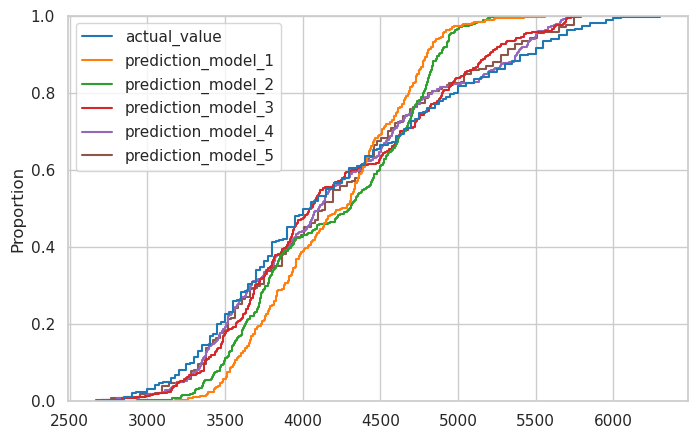

In [87]:
sns.ecdfplot(
    data = model_results
)

<AxesSubplot:ylabel='Proportion'>

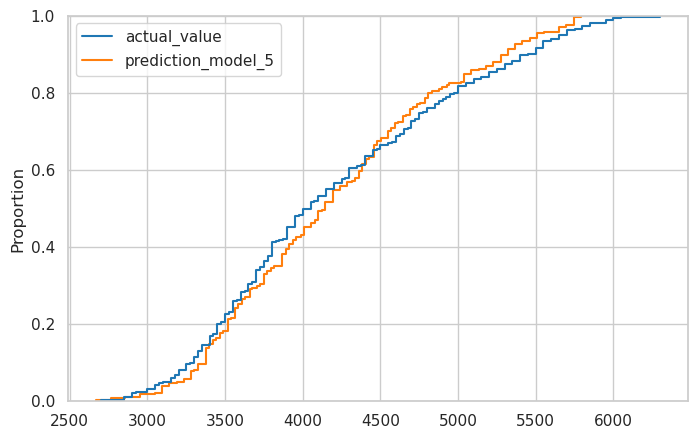

In [88]:
#Graficando solo los datos reales vs el modelo 5

sns.ecdfplot(
    data = model_results.select_columns(['actual_value', 'prediction_model_5'])
)

**Analizando los resultados desde la Probabilidad de densisad**

<AxesSubplot:ylabel='Density'>

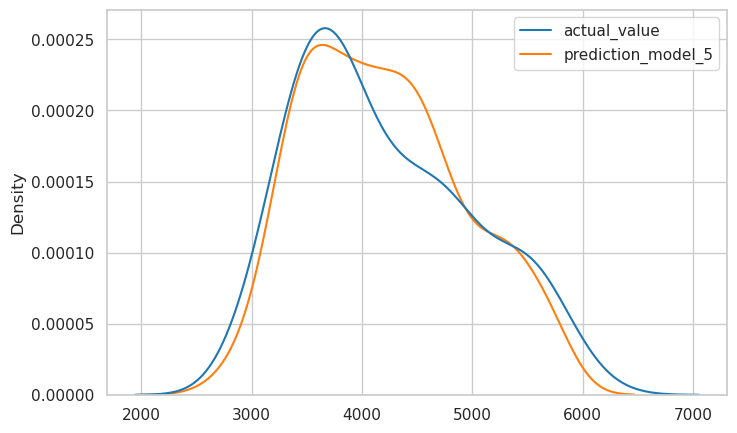

In [89]:
sns.kdeplot(
    data = model_results.select_columns(['actual_value', 'prediction_model_5']),
    #cumulative = True
)

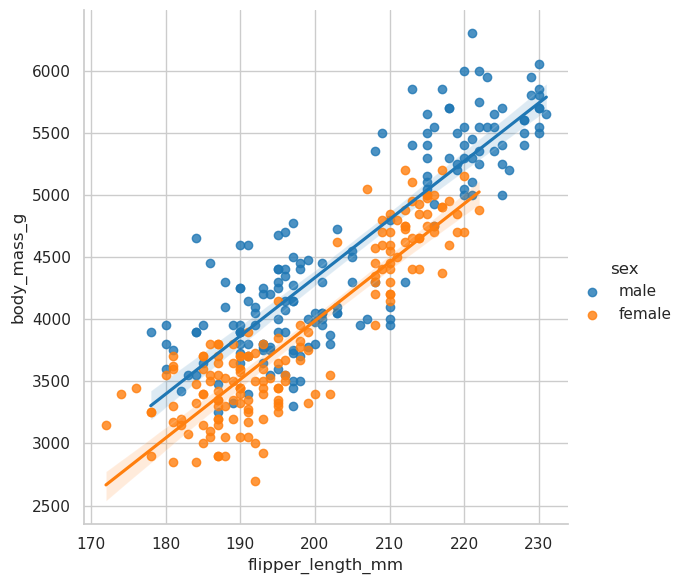

In [90]:
#Froma correcta de hacerlo (para ahorrar más tiempo)

sns.lmplot(
    data = process_penguin_df,
    x = 'flipper_length_mm',
    y = 'body_mass_g',
    hue = 'sex',
    height = 6
)

**Análisis de Regresión Logística**

¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

In [91]:
model_1_sex= smf.logit(
    formula = 'numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data = process_penguin_df
).fit()

model_1_sex.summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                  0.4793
Time:                        17:49:48   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

In [92]:
model_2_sex= smf.logit(
    formula = 'numeric_sex ~ flipper_length_mm + bill_length_mm',
    data = process_penguin_df
).fit()

model_2_sex.summary()

Optimization terminated successfully.
         Current function value: 0.630537
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      330
Method:                           MLE   Df Model:                            2
Date:                Fri, 24 Feb 2023   Pseudo R-squ.:                 0.09027
Time:                        17:49:48   Log-Likelihood:                -209.97
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.937e-10
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -7.0060      1.728     -4.055      0.000     -10.392      -3.620
flipper_length_mm     0.0077      0.011      0.698      0.485      -0.014       0.029
bill_length_mm        0.1244      0.030      4.212      0.000       0.067       0.182
=====================================================================================
"""

¿Podemos definir un modelo que nos ayude a identificar si un modelo pertenece a una determinada especie?

Dado que los modelos de Regresión logística son binarios, no puedo definir un modelo que me clasifique un pingüino entre las tres diferentes opciones, lo que puedo hacer es definir un modelo que prediga si un pingüino pertenece o no a una especie determinada.

In [93]:
process_penguin_df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [94]:
#Para este caso, tomaré la especie Adelie

process_penguin_df = process_penguin_df.assign(
    is_adelie = lambda df: df.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1, 0, 0])
)

In [95]:
model_is_adelie = smf.logit(
    formula = 'is_adelie ~ flipper_length_mm + C(sex)',
    data = process_penguin_df
).fit()

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [96]:
is_adelie_df_predictions = pd.DataFrame(
    dict(
        actual_adelie = process_penguin_df.is_adelie,
        predicted_values = model_is_adelie.predict().round()
    )
)

is_adelie_df_predictions

,actual_adelie,predicted_values
0,1,1.0
1,1,1.0
2,1,0.0
4,1,1.0
5,1,1.0
...,...,...
339,0,0.0
340,0,0.0
341,0,1.0
342,0,0.0


In [97]:
(
    is_adelie_df_predictions
    .value_counts(['actual_adelie', 'predicted_values'])
    .reset_index(name = 'count')
)

#El count nos da el resultado de las predicciones de acuerdo al cruce mostrado en la fila

,actual_adelie,predicted_values,count
0,0,0.0,151
1,1,1.0,129
2,0,1.0,36
3,1,0.0,17


Analizando la fiabilidad del modelo con Sklearn

In [98]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_predictions.actual_adelie,
        is_adelie_df_predictions.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_predictions.actual_adelie,
    is_adelie_df_predictions.predicted_values
)

[[151  36]
 [ 17 129]]


0.8408408408408409


    Verdadero Negativo (0,0): 151 - El modelo los clasificó como de una especie diferente al Adelie y es correcto
    Falso Positivo (0,1): 36 (Error Tipo I) - el modelo los clasificó como Adelie y es incorrecto
    Falso Negativo (1,0): 17 (Error Tipo II) - el modelo los clasificó como de otra especie diferente y son Adelie 
    Verdadero Positivo (1,1): 129 - El modelo los clasificó como Adelie y es correcto


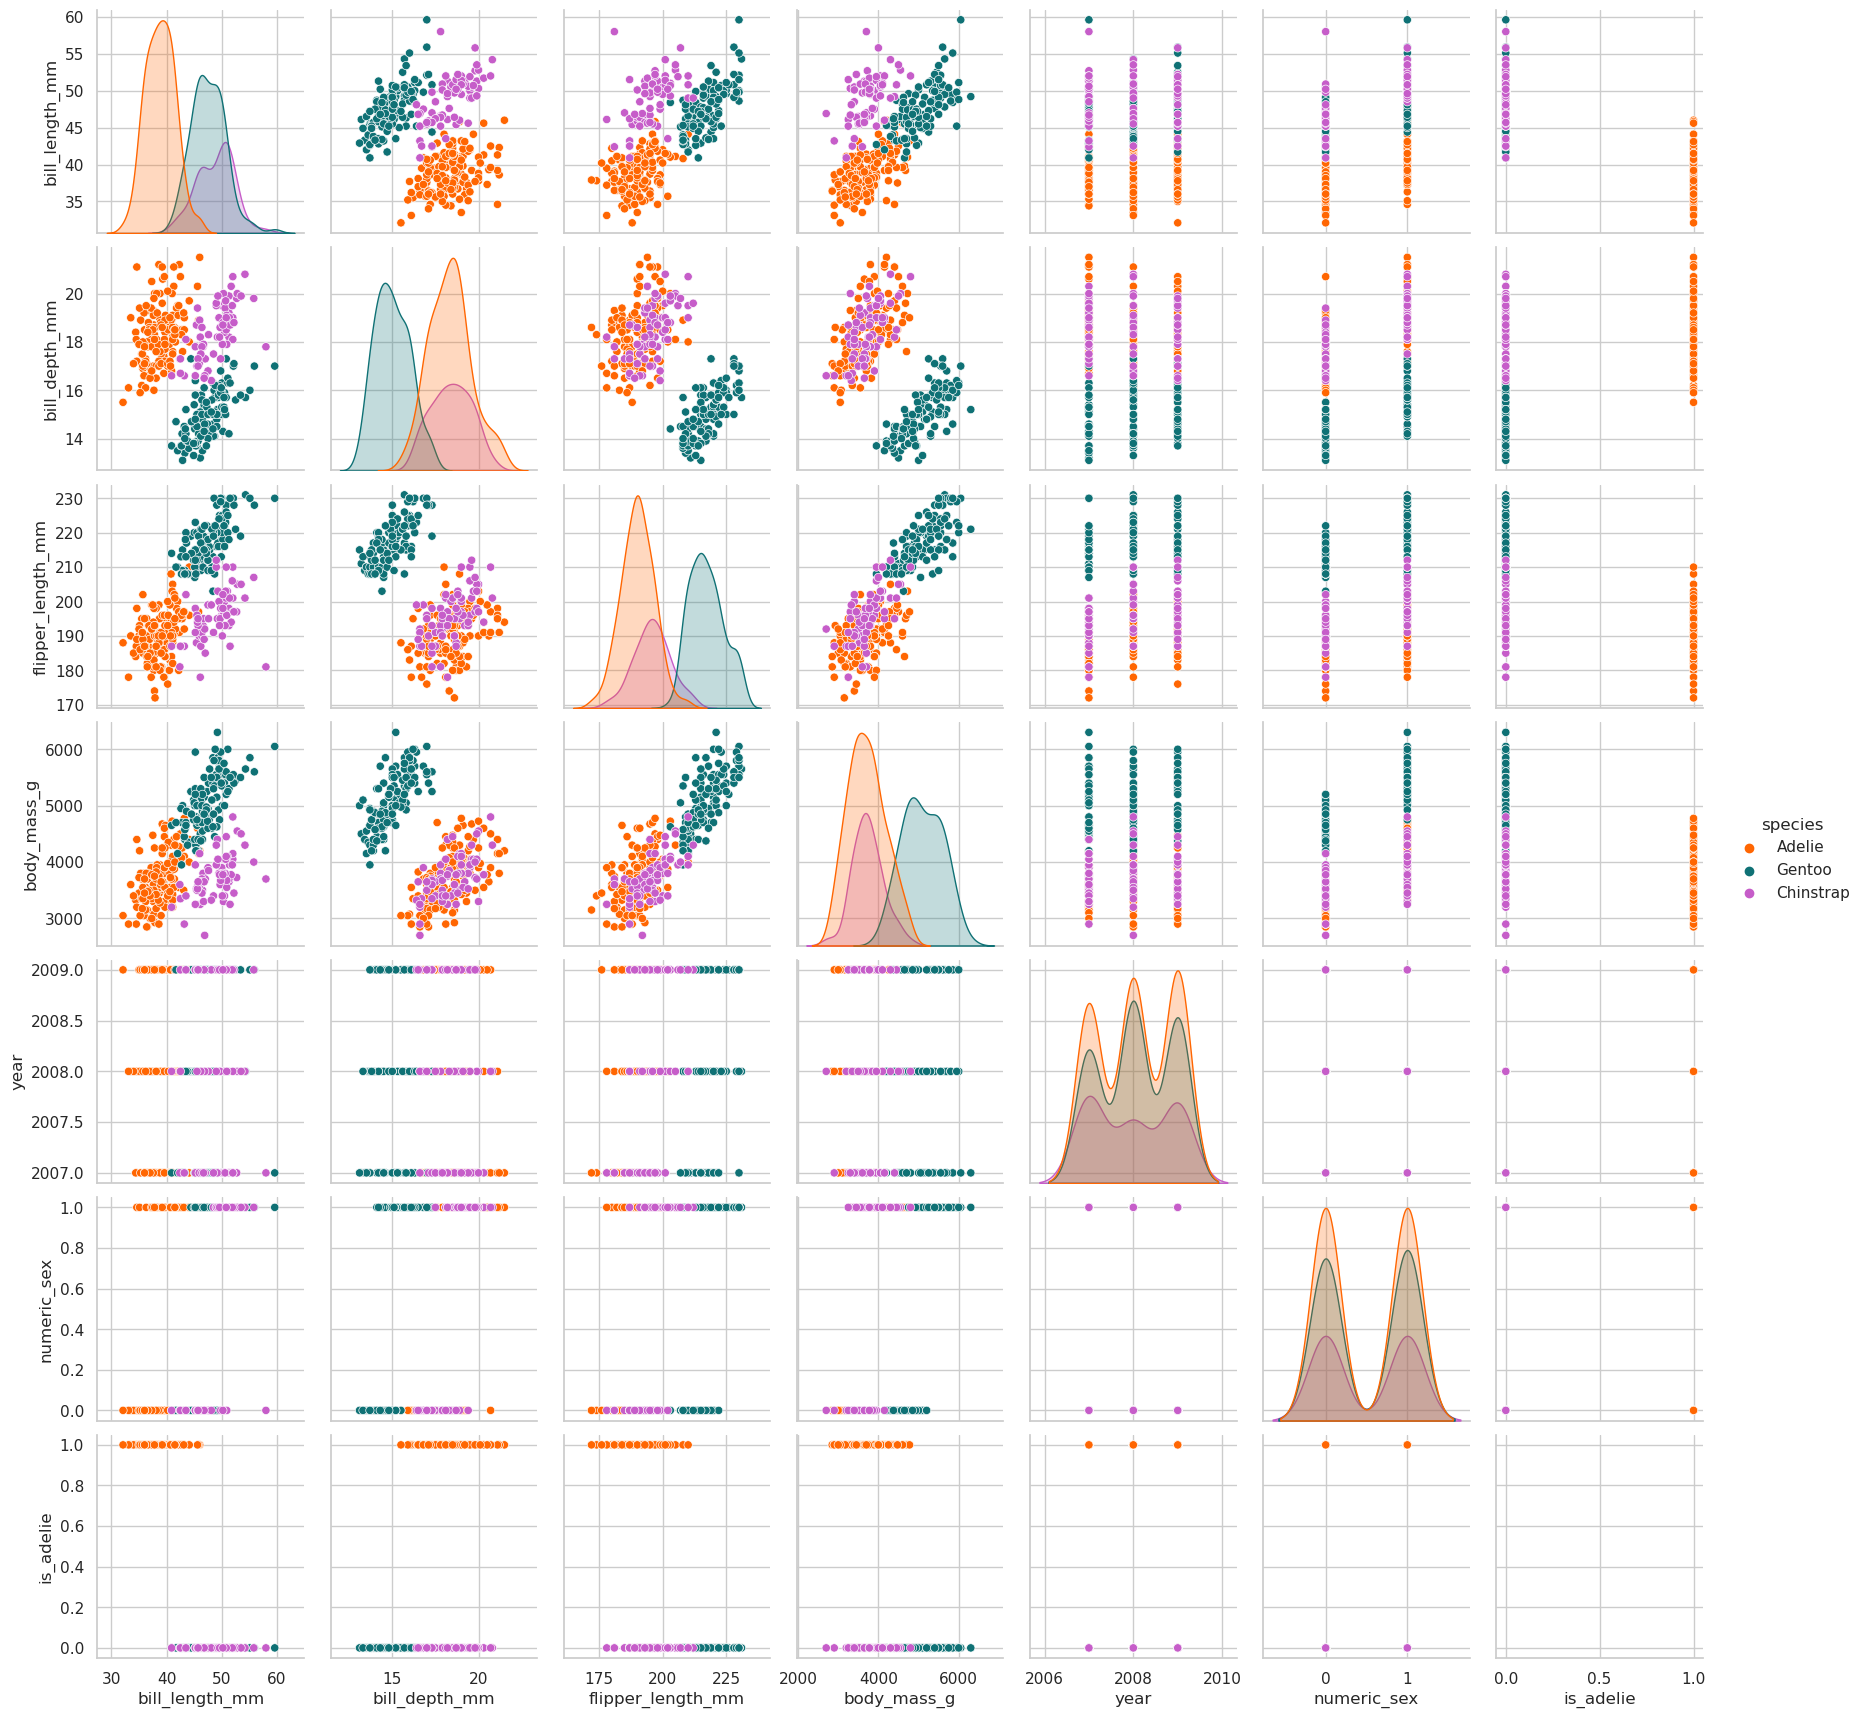

In [99]:
(
    sns.pairplot(
        data = process_penguin_df,
        hue = 'species',
        palette = penguin_color
    )
)